**Chapter2 --End-to-End Learning projects**

# Setup

In [480]:
# to support both python2 and python3
from __future__ import division,print_function,unicode_literals

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

path=os.path.join('.','images','end_to_end project')
def save_fig(fig_id,tight_layout=True,fig_extension='png',resolution=300):
    figurePath=os.path.join(path,fig_id)
    if tight_layout==True:
        plt.tight_layout()
    plt.savefig(figurePath,format=fig_extension,dpi=resolution)

In [481]:
# load the data
import pandas as pd
def loadData(path):
    return pd.read_csv(path)

In [482]:
dataPath=os.path.join('.','dataset','housing','housing.csv')
dataset=loadData(dataPath)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [483]:
dataset.shape

(20640, 10)

In [484]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [485]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [486]:
# to show a summary of numerical attributes
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


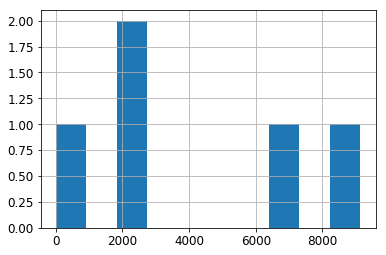

In [487]:
% matplotlib inline
dataset['ocean_proximity'].value_counts().hist()
plt.show()

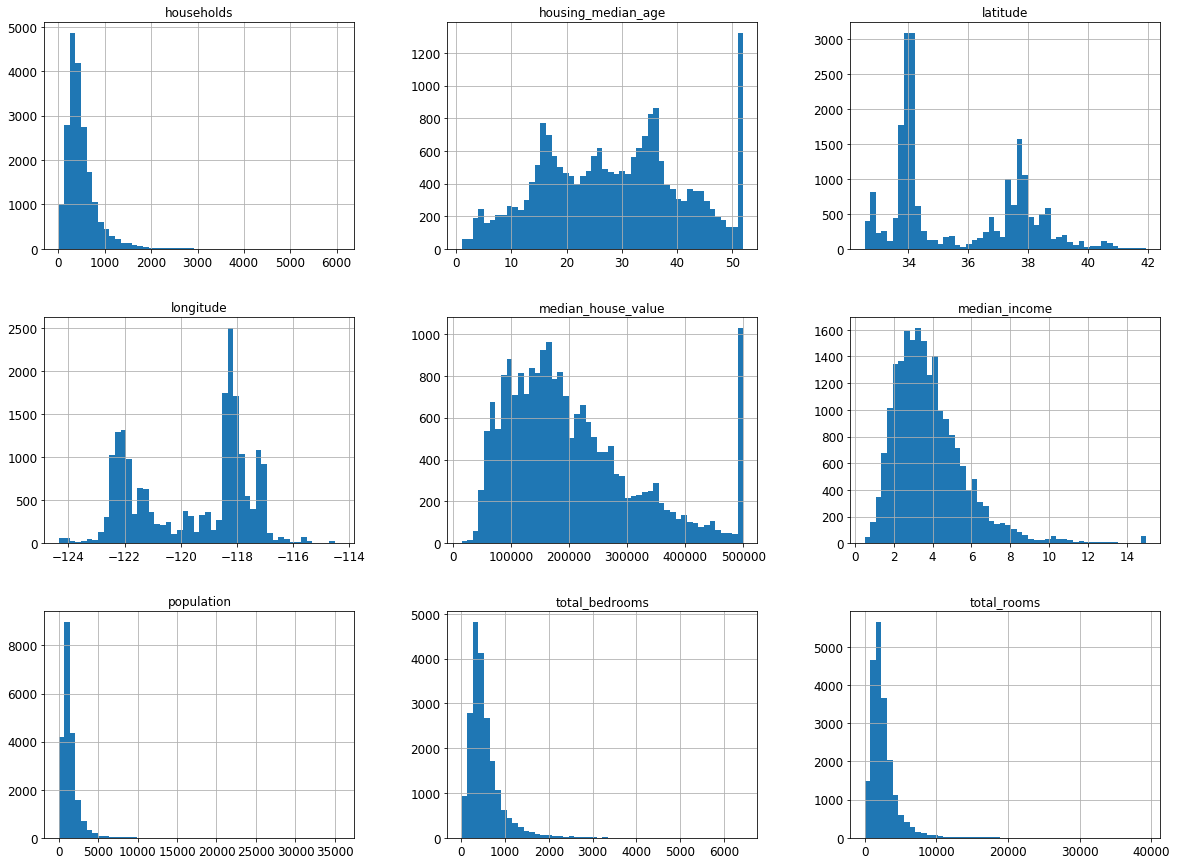

In [488]:
% matplotlib inline
dataset.hist(bins=50,figsize=(20,15))
#save_fig('attribute_histogram_plots')
plt.show()

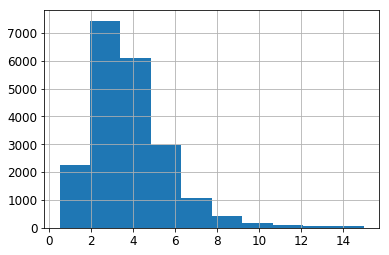

In [489]:
dataset['median_income'].hist()

In [490]:
dataset['income_cat']=np.ceil(dataset['median_income']/1.5)
dataset['income_cat'].sort_values(ascending=False).head()

5291     11.0
4605     11.0
17108    11.0
17107    11.0
17170    11.0
Name: income_cat, dtype: float64

In [491]:
dataset['income_cat']=dataset['income_cat'].where(dataset['income_cat']<5.0,5.0)

In [492]:
dataset['income_cat'].value_counts().sort_values(ascending=True)

1.0     822
5.0    2362
4.0    3639
2.0    6581
3.0    7236
Name: income_cat, dtype: int64

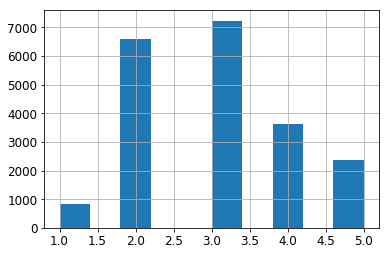

In [493]:
dataset['income_cat'].hist()

In [257]:
np.random.seed(42) # does not make any differendce 

In [258]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

# Split the Dataset
##### Split the training data and testing data according to the proportion of income_cat 

In [658]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_Index,test_Index in split.split(dataset,dataset['income_cat']):
    strat_train_set=dataset.loc[train_Index]
    strat_test_set=dataset.loc[test_Index]

In [495]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [496]:
dataset['income_cat'].value_counts()/len(dataset)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [497]:
dataset.shape

(20640, 11)

In [498]:
strat_train_set.head(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat


In [499]:
housing_num=strat_train_set.drop(['ocean_proximity'],axis=1)
housing_num.shape

(16512, 10)

In [500]:
housing_cat=strat_train_set[['ocean_proximity']]
housing_cat.shape

(16512, 1)

In [501]:
strat_train_set.shape

(16512, 11)

##### this method of generating the testing dataset is working but if we run the program again it will generate another dataset, over time, the algorithm will get to see all of the data in the dataset, which is what we want to avoid.

In [507]:
#split function
def test_train_split(dataset,testRatio=0.2):
    np.random.seed(42)  # we should this before permutation
    shuffled_indices=np.random.permutation(len(dataset)) # randomly sort the indices
    lenTest=int(len(dataset)*testRatio)
    test_indices=shuffled_indices[:lenTest]
    train_indices=shuffled_indices[lenTest:]
    testData=dataset.iloc[test_indices]
    trainData=dataset.iloc[train_indices]
    return testData,trainData

In [509]:
testData,trainData=test_train_split(dataset,0.2)
print(len(trainData),' training samples ',len(testData),' test Samples')

16512  training samples  4128  test Samples


In [510]:
testData.shape

(4128, 11)

In [511]:
# One method is to save the test dataset on the first run and then load it in the subsequent runs.
# The other method is to set np.random.seed(42) before np.random.permutation() run
# So that, it always generates the same shuffled indices

# However, those solutions will break next time, you fetch an updated dataset. A common solution is to use each instance's identifier
# to decide whether or not it should go in the test set(assuming instances have an unique and immutable identifier)

# For example, compute a hash of each instance's identifier, keep only the last byte of the hash, and put the instance in the test
# set if this value is lower or equal to 51 (~20% of 256). This ensures that the test set will remain consistent across multiple runs
# even if you refresh the dataset. The new test will contain 20% of the new instances, but it will not contain any instance that was
# previously in the training set.

# Discover and visualize the data to gain insights

In [512]:
housingTrain=strat_train_set.copy()
housingTrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


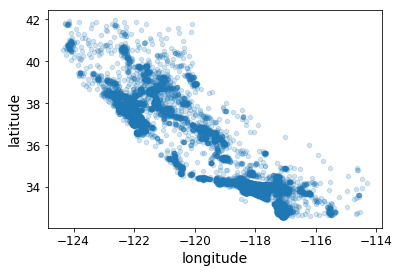

In [516]:
% matplotlib inline
housingTrain.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2)
plt.show()

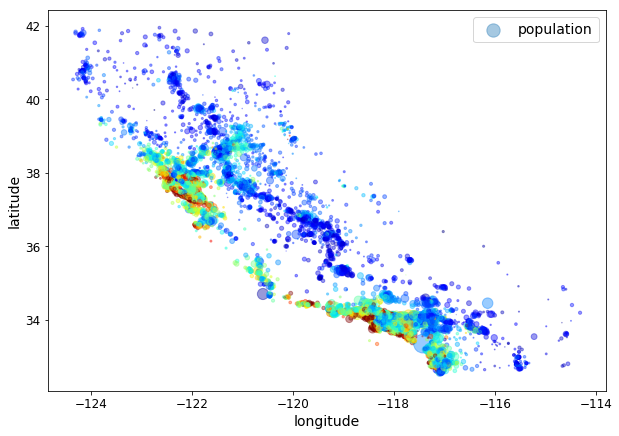

In [543]:
import matplotlib.image as mpimg
ax=housingTrain.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             s=housing['population']/100,label='population',
             figsize=(10,7),c='median_house_value',
             cmap=plt.get_cmap('jet'),colorbar=False,
             sharex=False)

prices=housingTrain['median_house_value']
tick_values=np.linspace(prices.min(),prices.max(),11)

#cbar=plt.colorbar()

#cbar.ax.set_yticklabels(['$%dK'%(round(v/1000)) for v in tick_values],fontsize=14)
#cbar.set_label('Median House Value',fontsize=16)


plt.legend(fontsize=14)
plt.show()

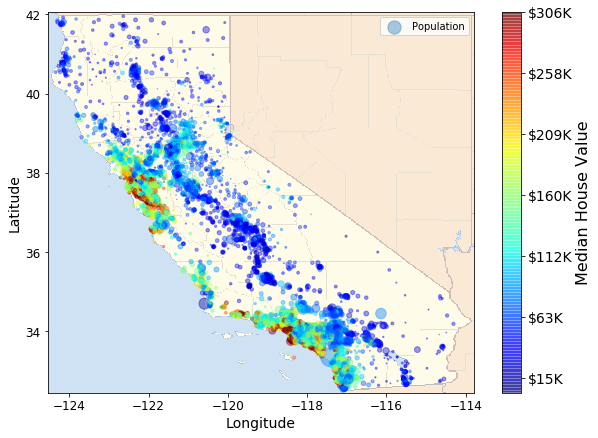

In [537]:
% matplotlib inline
import matplotlib.image as mping
california_img=mping.imread('.'+'/images/'+'end_to_end project/california.png')
ax=housing.plot(kind='scatter',x='longitude',y='latitude',s=housing['population']/100,
                label='Population',c='median_house_value',cmap=plt.get_cmap('jet'),
                colorbar=False,sharex=False,figsize=(10,7),alpha=0.4)
plt.imshow(california_img,extent=[-124.55,-113.80,32.45,42.05],alpha=0.5,
           cmap=plt.get_cmap('jet'))
plt.ylabel('Latitude',fontsize=14)
plt.xlabel('Longitude',fontsize=14)


prices=housingTrain['median_house_value']
tick_values=np.linspace(prices.min(),prices.max(),11)
cbar=plt.colorbar()
cbar.ax.set_yticklabels(['$%dK'%(round(v/1000)) for v in tick_values],fontsize=14)
cbar.set_label('Median House Value',fontsize=16)


plt.show()

In [529]:
housingTrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


## Explore the Correlationships between the features

In [544]:
corr_matrix=strat_train_set.corr()

In [545]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

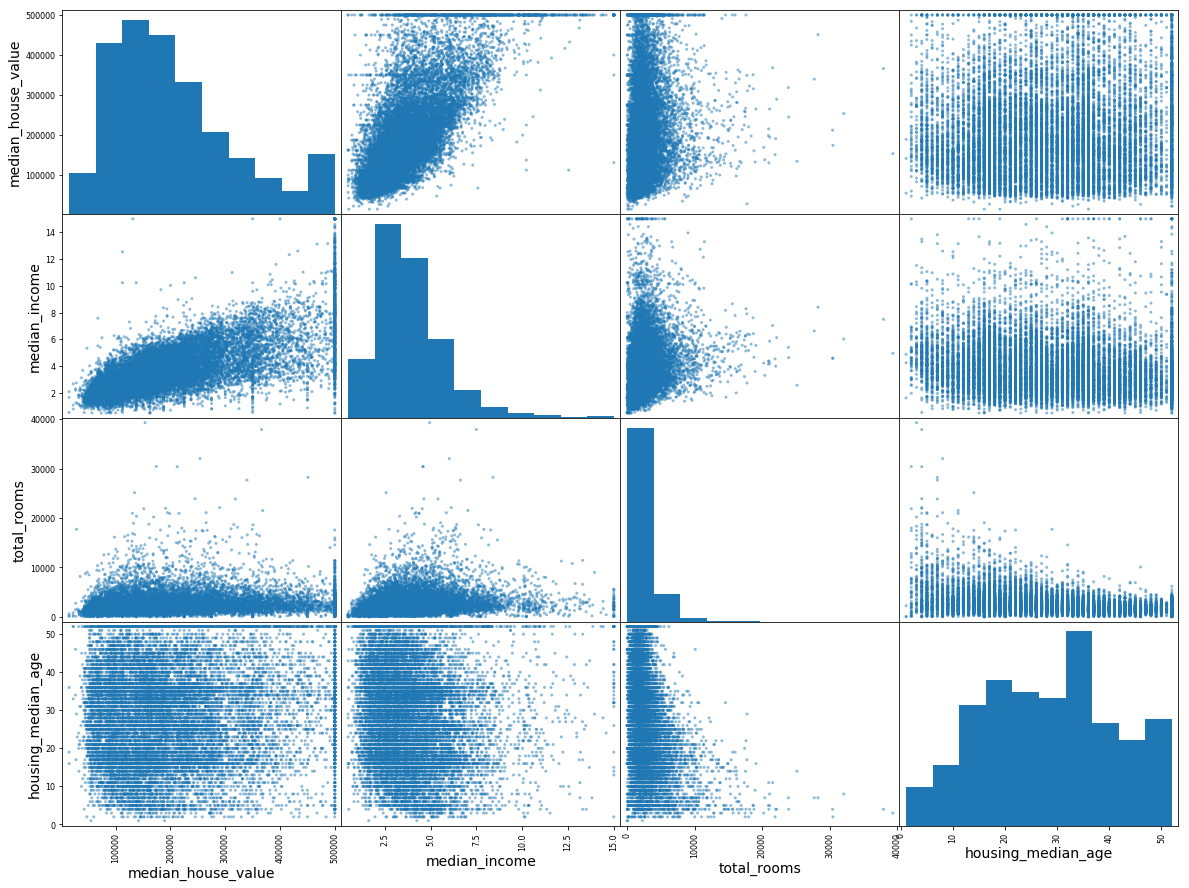

In [548]:
# from pandas.tools.plotting import scatter_matrix 
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(strat_train_set[attributes],figsize=(20,15))
plt.show()

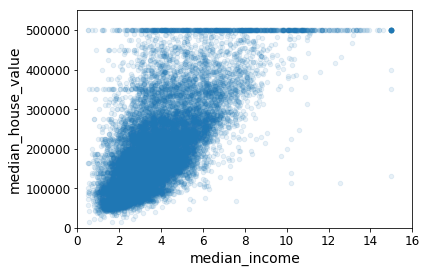

In [549]:
# the median_income vs median_house_value plot
strat_train_set.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)
plt.axis([0,16,0,550000])
plt.show()

In [656]:
strat_train_set['rooms_per_household']=strat_train_set['total_rooms']/strat_train_set['households']
strat_train_set['bedrooms_per_household']=strat_train_set['total_bedrooms']/strat_train_set['households']
strat_train_set['population_per_household']=strat_train_set['population']/strat_train_set['households']

In [657]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0,4.625369,1.035398,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0,6.008850,0.955752,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0,4.225108,1.019481,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0,5.232295,1.050992,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0,4.505810,1.042379,3.047847
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,INLAND,3.0,5.140351,1.031579,2.540351
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,<1H OCEAN,5.0,8.061372,1.144404,2.776173
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,INLAND,4.0,5.442667,0.781333,2.496000
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN,2.0,4.257991,1.061644,4.374429
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,1.0,2.373272,1.055300,12.396313


In [553]:
corr_matrix=strat_train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_household     -0.043343
longitude                  -0.047432
latitude                   -0.142724
Name: median_house_value, dtype: float64

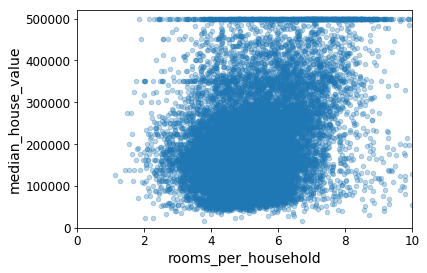

In [559]:
strat_train_set.plot(kind='scatter',x='rooms_per_household',y='median_house_value',alpha=0.3)
plt.axis([0,10,0,520000])
plt.show()

## Prepare the data for Machine Learning Algorithms

In [668]:
housing_values=strat_train_set.drop(['median_house_value'],axis=1)
housing_labels=strat_train_set[['median_house_value']].copy()

In [562]:
housing_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [566]:
sample_incomplete_rows=housing_values[housing_values.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3.0


In [567]:
sample_incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [568]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3.0


In [569]:
sample_incomplete_rows.drop('total_bedrooms',axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3.0


In [570]:
median=housing_values['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median,inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3.0


In [571]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3.0


In [572]:
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy='median')

Remove the text attribute values, because the median can only be calculated on the numerical attributes

In [575]:
housing_num_values=housing_values.drop('ocean_proximity',axis=1)
# alternatively: housing_num_value=housing_values.select_dtypes(include=[np.number])

In [576]:
imputer.fit(housing_num_values)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [577]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

Check that this is the same as manually computing the median of each attributes

In [578]:
housing_num_values.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

Transform the target:

In [579]:
X=imputer.transform(housing_num_values)

In [580]:
housing_num_values_tr=pd.DataFrame(X,columns=housing_num_values.columns,index=list(housing_num_values.index.values))

In [583]:
housing_num_values_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,2.0
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,4.0
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,4.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,2.0
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,3.0


In [584]:
imputer.strategy

'median'

In [587]:
housing_cat_values=housing_values[['ocean_proximity']]
housing_cat_values.head(2)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN


### Custom Transformers

In [588]:
# add the extra features
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,7
class CombineAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_household=X[:,bedrooms_ix]/X[:,households_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_household]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [589]:
attr_adder=CombineAttributesAdder(add_bedrooms_per_room=True)
train_extra_attributes=attr_adder.transform(housingTrain.values)

In [590]:
added_Attributes=['rooms_per_household','population_per_household','bedrooms_per_househould']

In [282]:
housing_extra_attributes

array([[-118.02, 33.93, 35.0, ..., '<1H OCEAN', 580.9450038729667,
        294.8295894655306],
       [-117.09, 32.79, 20.0, ..., 'NEAR OCEAN', 762.4602703363487,
        348.92249659460026],
       [-120.14, 34.59, 24.0, ..., 'NEAR OCEAN', 380.9546471232094,
        173.93994194070336],
       ...,
       [-118.38, 34.03, 36.0, ..., '<1H OCEAN', 715.9896401308615,
        598.4187568157033],
       [-121.96, 37.58, 15.0, ..., '<1H OCEAN', 625.0874248146594,
        310.70779129948244],
       [-122.42, 37.77, 52.0, ..., 'NEAR BAY', 1640.846437584935,
        1016.8899242865464]], dtype=object)

In [283]:
cols=housingTrain.columns.tolist()
cols.extend(added_Attributes)
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'income_cat',
 'rooms_per_household',
 'population_per_household',
 'bedrooms_per_househould']

In [591]:
trainAddedAttrs=pd.DataFrame(data=train_extra_attributes,columns=list(housingTrain.columns)+added_Attributes)

In [592]:
trainAddedAttrs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,population_per_household,bedrooms_per_househould
0,-121.89,37.29,38,1568,351,710,339,2.7042,286600,<1H OCEAN,2,579.839,262.555,129.798
1,-121.93,37.05,14,679,108,306,113,6.4214,340600,<1H OCEAN,5,105.74,47.6532,16.8188
2,-117.2,32.77,31,1952,471,936,462,2.8621,196900,NEAR OCEAN,2,682.017,327.033,164.564
3,-119.61,36.31,25,1847,371,1460,353,1.8839,46300,INLAND,2,980.413,774.988,196.932
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,254500,<1H OCEAN,3,2172.21,1469.34,502.521


In [593]:
trainAddedAttrs.shape

(16512, 14)

In [594]:
housingTrain_cat=trainAddedAttrs[['ocean_proximity']]
housingTrain_num=trainAddedAttrs.drop(['ocean_proximity'],axis=1)

In [595]:
housingTrain_cat.head()

,ocean_proximity
0,<1H OCEAN
1,<1H OCEAN
2,NEAR OCEAN
3,INLAND
4,<1H OCEAN


In [599]:
housingTrain_num[housingTrain_num.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,population_per_household,bedrooms_per_househould
113,-118.3,34.07,18,3759,NaN,3296,1462,2.2708,175000,2,1655.36,1451.47,NaN
116,-117.86,34.01,16,4632,NaN,3038,727,5.1762,264400,4,894.865,586.917,NaN
216,-121.97,37.35,30,1955,NaN,999,386,4.6328,287100,4,421.991,215.636,NaN
303,-117.3,34.05,6,2155,NaN,1039,391,1.6675,95800,2,1292.35,623.088,NaN
321,-122.79,38.48,7,6837,NaN,3468,1405,3.1662,191000,3,2159.37,1095.32,NaN


In [600]:
housingTrain_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 13 columns):
longitude                   16512 non-null object
latitude                    16512 non-null object
housing_median_age          16512 non-null object
total_rooms                 16512 non-null object
total_bedrooms              16354 non-null object
population                  16512 non-null object
households                  16512 non-null object
median_income               16512 non-null object
median_house_value          16512 non-null object
income_cat                  16512 non-null object
rooms_per_household         16512 non-null object
population_per_household    16512 non-null object
bedrooms_per_househould     16354 non-null object
dtypes: object(13)
memory usage: 1.6+ MB


In [596]:
housingTrain_num.loc[sample_incomplete_rows.index.values]

C:\Users\64414\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,population_per_household,bedrooms_per_househould
4629,-119.81,36.73,47,1314,416,1155,326,1.372,49600,1,957.726,841.837,303.207
6068,-121.84,37.34,33,1019,191,938,215,4.0929,165000,3,248.968,229.177,46.6662
17923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13656,-117.89,34.12,35,1470,241,885,246,4.9239,168800,4,298.544,179.736,48.9449
19252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [601]:
housing_num_values_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
income_cat            16512 non-null float64
dtypes: float64(9)
memory usage: 1.9 MB


In [605]:
housing_num_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
income_cat            16512 non-null float64
dtypes: float64(9)
memory usage: 1.9 MB


In [606]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
income_cat            16512 non-null float64
dtypes: float64(10)
memory usage: 2.0 MB


# DataFrame Features Selector

In [615]:
from sklearn.base import BaseEstimator,TransformerMixin

In [340]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [617]:
numAttrNames=housing_num_tr.columns.tolist()
catAttrNames=['ocean_proximity']

In [623]:
len(numAttrNames)

13

In [639]:
strat_train_set.shape

(16512, 11)

In [640]:
housing_num.shape

(16512, 10)

In [641]:
numAttrValuesSel=DataFrameSelector(list(housing_num)).transform(strat_train_set)

In [643]:
numAttrValuesSel.shape

(16512, 10)

In [644]:
catAttrValuesSel=DataFrameSelector(catAttrNames).transform(strat_train_set)
catAttrValues.shape

(16512, 1)

In [645]:
catAttrValues

array([['<1H OCEAN'],
       ['<1H OCEAN'],
       ['NEAR OCEAN'],
       ...,
       ['INLAND'],
       ['<1H OCEAN'],
       ['NEAR BAY']], dtype=object)

# Number PipeLine

对于数据处理，首先要查看该数据集是否有空集，若有则需要选取一种填充空集的策略；然后，再进行对特征的选择和整合；最后，对数据进行归一化；
注意：这些操作先是在training dataset上操作

In [648]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

In [679]:
numericalValueCols=list(housing_values.columns)
numericalValueCols.pop(-2)
numericalValueCols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat']

In [681]:
num_pipeline=Pipeline([
                       ('featureSelector',DataFrameSelector(numericalValueCols)),
                       ('imputer',Imputer(strategy='median')),
                       ('attribs_Adder',CombineAttributesAdder()),
                       ('std_scaler',StandardScaler())
                      ])

In [682]:
selectedNumericalFeatures=num_pipeline.fit_transform(housing_values)

In [684]:
selectedNumericalFeatures=pd.DataFrame(selectedNumericalFeatures,columns=numericalValueCols+added_Attributes)

In [687]:
selectedNumericalFeatures.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,population_per_household,bedrooms_per_househould
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.954456,-0.304198,-0.447889,-0.254408
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.890305,-1.084316,-0.968477,-0.998973
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.954456,-0.136067,-0.291694,-0.025287
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.954456,0.354937,0.793456,0.188023
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.006202,2.316008,2.475484,2.201939


# cat_pipeline---does not work

In [690]:
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder,LabelEncoder
cat_attrs=['ocean_proximity']
cat_values=DataFrameSelector(cat_attrs).transform(strat_train_set)

In [691]:
cat_values=LabelBinarizer().fit_transform(housing_cat)

In [692]:
cat_values

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [693]:
trainingArray=np.c_[selectedNumericalFeatures.values,cat_values]

In [694]:
trainingArray.shape

(16512, 17)

# Training models

In [730]:
some_data=trainingArray[:100]

In [731]:
some_labels=housing_labels.iloc[:100].values.ravel()

#### Logistic Regression

In [732]:
from sklearn.linear_model import LogisticRegression
lin_reg=LogisticRegression()
lin_reg.fit(some_data,some_labels)
predictions=lin_reg.predict(some_data)

In [733]:
predictions.shape

(100,)

#### RMSE Metrics

In [734]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(predictions,some_labels)
rmse=np.sqrt(mse)
print('RMSE: {}'.format(rmse))

RMSE: 97381.520003284


##### MAE Metrics

In [735]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(predictions,some_labels)
print('MAE: {}'.format(mae))

MAE: 45862.15


##### Decision Tree Classifier

In [737]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(some_data,some_labels)
predictions=tree_reg.predict(some_data)
mse=mean_squared_error(some_labels,predictions)
rmse=np.sqrt(mse)
mae=mean_absolute_error(some_labels,predictions)
print('RMSE: {}'.format(rmse))
print('MAE: {}'.format(mae))

RMSE: 0.0
MAE: 0.0


# Fine-tune Model

In [739]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,trainingArray,housing_labels.values.ravel(),
                      scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [742]:
def display_scores(scores):
    print('Scores: ',scores)
    print('Mean: ',scores.mean())
    print('Standard deviation: ',scores.std())

In [743]:
display_scores(tree_rmse_scores)

Scores:  [67666.05088886 64853.24757003 70388.60302993 70171.72922531
 69474.65232453 75089.2786985  68193.44914132 70181.45438067
 68177.17710266 70309.86605884]
Mean:  69450.55084206622
Standard deviation:  2489.777868340685


In [746]:
lin_scores=cross_val_score(lin_reg,trainingArray,housing_labels.values.ravel(),
                          scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

C:\Users\64414\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: 

In [ ]:
display_scores(lin_rmse_scores)

##### RandomForest Regression

In [769]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(random_state=42)
forest_reg.fit(trainingArray,housing_labels.values.ravel())
predictions=forest_reg.predict(trainingArray)
forest_mse=mean_squared_error(housing_labels.values.ravel(),predictions)
forest_rmse=np.sqrt(forest_mse)

In [749]:
forest_rmse

21593.357388042175

##### Validation Processing

In [751]:
from sklearn.model_selection import cross_val_score
forest_scores=cross_val_score(forest_reg,trainingArray,housing_labels.values.ravel(),
                             scoring='neg_mean_squared_error',cv=10)
forest_rmse_score=np.sqrt(-forest_scores)
display_scores(forest_rmse)

Scores:  21593.357388042175
Mean:  21593.357388042175
Standard deviation:  0.0


In [773]:
forest_reg.feature_importances_.shape

(17,)

# GridSearch 

In [759]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':[3,10,30,40],'max_features':[2,4,6,8,10]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

In [760]:
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                        scoring='neg_mean_squared_error')

In [761]:
grid_search.fit(trainingArray,housing_labels.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 40], 'max_features': [2, 4, 6, 8, 10]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [762]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 40}

In [763]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [764]:
cvrst=grid_search.cv_results_

In [767]:
for mean_square,params in zip(cvrst['mean_test_score'],cvrst['params']):
    print(np.sqrt(-mean_square),params)

66507.55868599232 {'max_features': 2, 'n_estimators': 3}
58209.11559774268 {'max_features': 2, 'n_estimators': 10}
55672.78569896507 {'max_features': 2, 'n_estimators': 30}
55893.08791280479 {'max_features': 2, 'n_estimators': 40}
64889.9601962645 {'max_features': 4, 'n_estimators': 3}
56641.03551735804 {'max_features': 4, 'n_estimators': 10}
54209.17838006509 {'max_features': 4, 'n_estimators': 30}
53714.13419728295 {'max_features': 4, 'n_estimators': 40}
62146.51271643368 {'max_features': 6, 'n_estimators': 3}
55475.607161424436 {'max_features': 6, 'n_estimators': 10}
53041.41244923364 {'max_features': 6, 'n_estimators': 30}
52614.776454816754 {'max_features': 6, 'n_estimators': 40}
60673.58561606952 {'max_features': 8, 'n_estimators': 3}
54521.380996455235 {'max_features': 8, 'n_estimators': 10}
52296.8707594826 {'max_features': 8, 'n_estimators': 30}
51944.065531786946 {'max_features': 8, 'n_estimators': 40}
58995.11540191875 {'max_features': 10, 'n_estimators': 3}
53840.0987690000